In [ ]:
!pip install regex
!pip install pybind11

In [40]:
%load_ext autoreload
%autoreload 2

import oddesa
import importlib
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
oddesa.equation("x' = x - k*x|tau + x|1 + x'|1", 
                k=2, tau = np.linspace(1,2,1001))


In [ ]:
oddesa.equation("x'' = x - k * x|tau + x|1.5 + x''|tau", 
                k=2, tau=1)

In [ ]:
oddesa.cpp_errors("int x˛ = 0; int main() {return 0;}")

In [ ]:
lorenz_eq = oddesa.equation("""
    x' = sigma*(y - x); 
    y' = rho*x - y - x*z;
    z' = -beta*z + x*y;
""")

In [ ]:
params, solution = lorenz_eq.solution(
    (0,1000),
    sigma=10, rho=28., beta=8/3,
    x = 0, y = 20, z = 30)

t, x, y, z = solution[0]

In [ ]:
fig, ax = plt.subplots(figsize=(8,8), dpi=300)

ax.plot(x+y, z, c='k', lw=0.1)

In [ ]:
plt.plot(t, x)
plt.plot(t, y)
plt.plot(t, z)

In [ ]:
plt.plot(x+y, z, c='k', lw=0.01)

In [ ]:
list(enumerate(["a","b","c"]))

In [ ]:
"asdfasdf \n asdf".split("\n")

In [67]:
harmonic_osc = oddesa.equation("""
    x'' = - k*k * x;
""", at="all", compile=True)

harmonic_osc

[event{'where': 'step', 'filter': None, 'save': "t, x, x'", 'change': None, 'action': None}]
Compiler returned some errors.
Code:
1 
2 #include <pybind11/pybind11.h>
3 #include <pybind11/stl.h>
4 #include <pybind11/numpy.h>
5 #include "equation.hpp"
6 #include "vector_to_numpy.hpp"
7 #include "utils/cartesian_product.hpp"
8 #include <vector>
9 #include <tuple>
10 namespace py = pybind11;
11 
12 struct System : IVP<2, System> {
13     double k;
14                 double x₀;
15                 double x´₀;
16 
17     System(const tuple<double, double, double>& params) {
18         tie(k, x₀, x´₀) = params;
19 
20         lhs = [this](double t, const Vec<2>& XXX){
21             const auto& [x, x´] = XXX;
22             return Vec<2>{
23                 x´,
24                             - k*k * x
25             };
26         };
27 
28         initial_condition = 
29             [this](double t){return Vec<2>{x₀, x´₀};};
30 
31     }
32 
33     tuple<Event<tuple<double, double, double>>> s

equation{'equations': {'x': "x'", "x'": '- k*k * x'}, 'initial_conditions': {'x': 'x₀', "x'": "x'₀"}, 'variable_names': ['x', "x'"], 'parameter_names': ['k', 'x₀', 'x´₀'], 'delays': {}, 'delayed_variable_names': [], 'highest_derivatives': ["x''"], 'uuid': '6cf0ffdc_9a55_4be7_bcc7_16804ee629fa', 'events': [event{'where': 'step', 'filter': None, 'save': "t, x, x'", 'change': None, 'action': None}]}

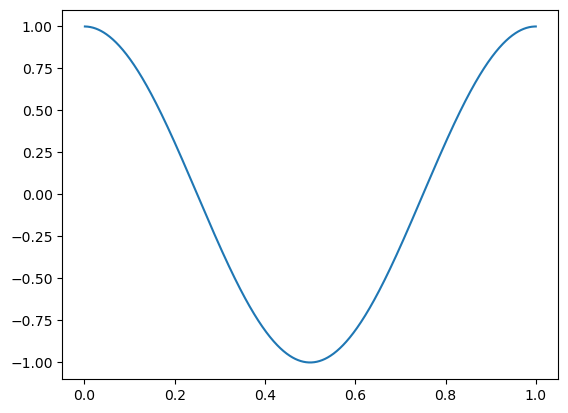

In [63]:
# params, solution = harmonic_osc.solution(k = 0.1, ic=[1., 2], interval=[0, 1])
params, solution = harmonic_osc.solution((0, 1), k = (2*np.pi), x = (1, 0))
t, x, x_ = solution[0]
import matplotlib.pyplot as plt

plt.plot(t, x)
# plt.plot(t, x_)

In [ ]:
bouncing_eq = oddesa.equation(
    """
        x'' = -1;
    """, events = oddesa.event("x < 0", change="x' = -k*x'")
)